In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
%run PARAMETERS.py
NAME = 'APG'
MCMC_STEPS = 5
PATH = NAME + '-bmnist-%dsamples' % (SAMPLE_SIZE)
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:1')

In [3]:
from model_operations import Init_models, Save_models
models, optimizer = Init_models(FRAME_PIXELS=FRAME_PIXELS, 
                                DIGIT_PIXELS=DIGIT_PIXELS, 
                                HIDDEN_LIST=HIDDEN_LIST, 
                                CUDA=CUDA, 
                                device=DEVICE, 
                                lr=LEARNING_RATE, 
                                RESTORE=True, 
                                PATH=PATH)

(enc_coor, enc_digit, dec_digit) = models

from crop import *
crop = Crop(digit_size=28, 
            frame_size=64, 
            CUDA=CUDA, 
            device=DEVICE)

In [12]:
from apg import APG_test
from testing import Eval
from viz_mc import Viz_MC
BATCH_SIZE = 5
Viz_INTERVAL = 4
FS = 15
TITLE_FS = 20
BOUND = 10
DATA_PTR = 46

Data = []

In [13]:
evaluator = Eval(NUM_GROUPS, K, D, BATCH_SIZE, CUDA, DEVICE)
visualizer = Viz_MC(K, Viz_INTERVAL, FS, TITLE_FS, BOUND)
Metrics_sample = evaluator.Test_uniform(models, APG_test, data_path, mnist_mean, crop, data_ptr=DATA_PTR, mcmc_steps=8, sample_size=1)

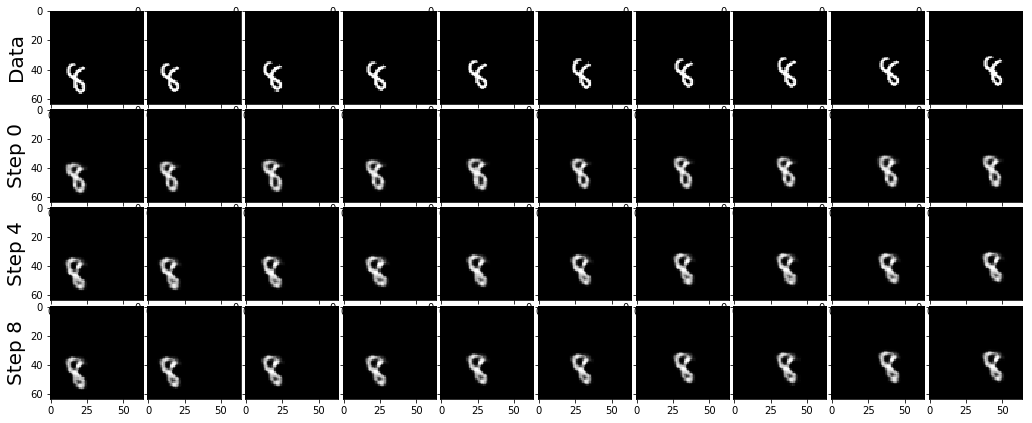

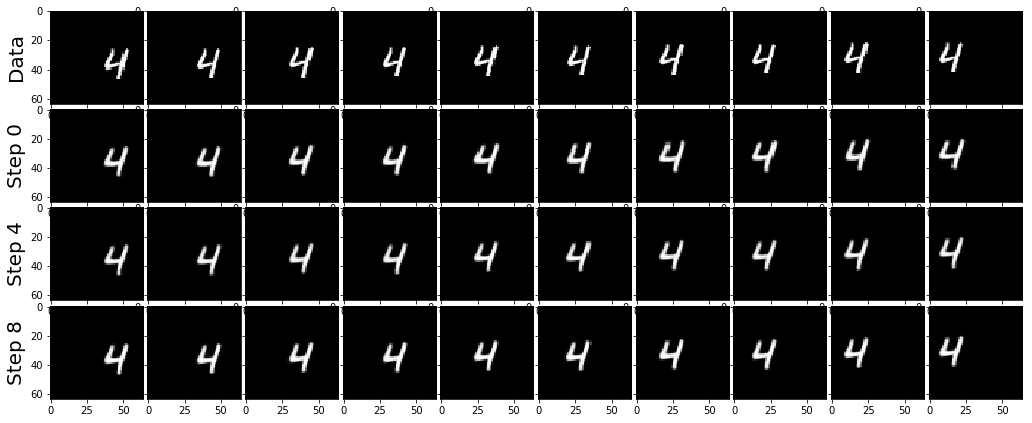

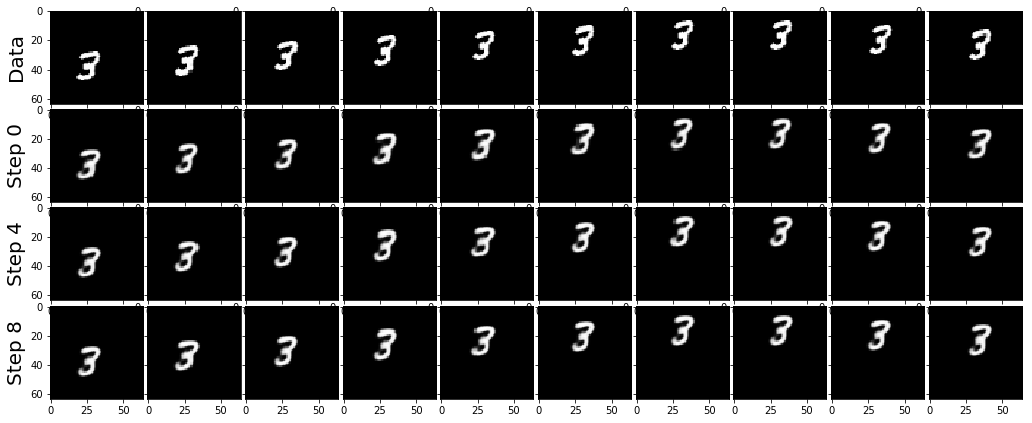

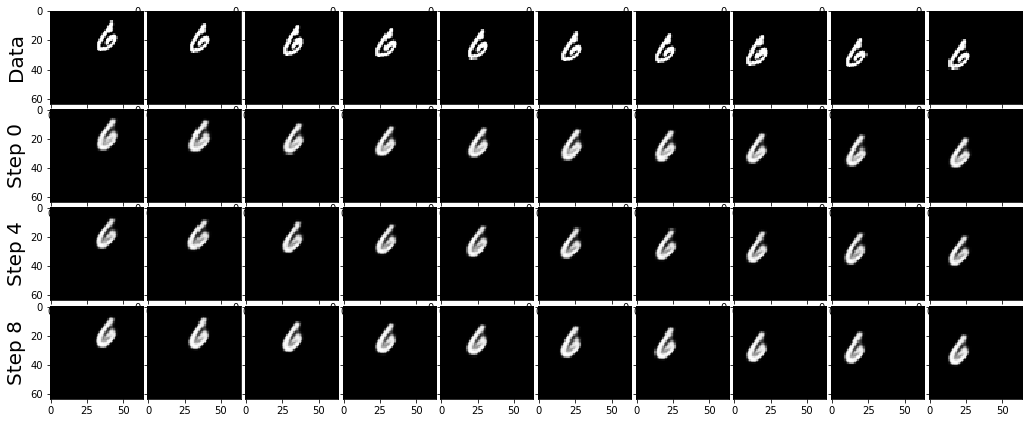

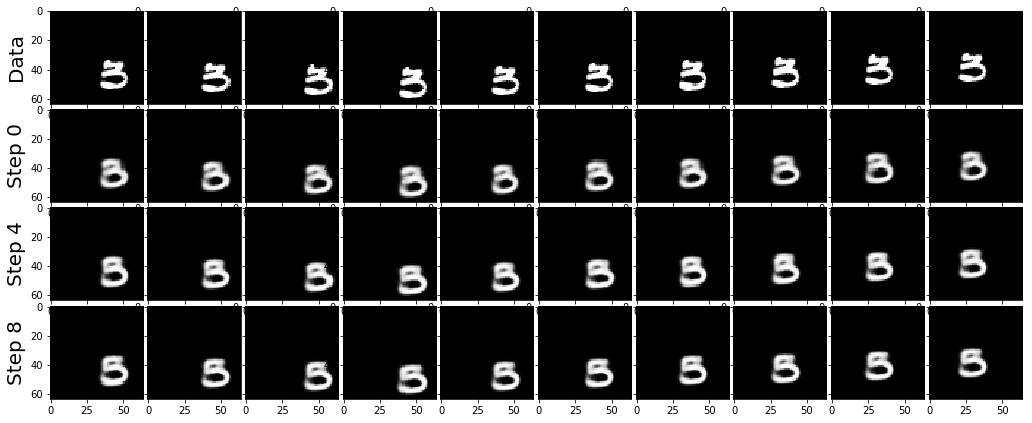

In [14]:
visualizer.Plot_TJs(Metrics_sample['data'], Metrics_sample['samples'], Metrics_sample['recon'], filename='bmnist-samples-%d' % DATA_PTR)